<a href="https://colab.research.google.com/github/Bharathchandra23/autism-detection-using-machine-learning/blob/main/ASD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre processing

In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [ ]:
df = pd.read_csv('asd_data_csv.csv')
df.head()


,Social_Responsiveness_Scale,Age_Years,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developoental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_member_with_ASD,Outcome
0,3,2,1,1,1,1,1,1,1,1,1,1,0,0
1,6,3,1,1,1,1,1,1,2,1,0,1,0,1
2,7,3,1,1,1,1,1,1,4,1,0,1,0,1
3,1,2,1,1,0,1,1,1,2,1,0,0,0,1
4,3,2,1,1,0,1,1,1,1,1,1,0,0,1


In [ ]:
df.shape

(1961, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Social_Responsiveness_Scale                         1961 non-null   int64
 1   Age_Years                                           1961 non-null   int64
 2   Speech Delay/Language Disorder                      1961 non-null   int64
 3   Learning disorder                                   1961 non-null   int64
 4   Genetic_Disorders                                   1961 non-null   int64
 5   Depression                                          1961 non-null   int64
 6   Global developoental delay/intellectual disability  1961 non-null   int64
 7   Social/Behavioural Issues                           1961 non-null   int64
 8   Childhood Autism Rating Scale                       1961 non-null   int64
 9   Anxiety_disorder   

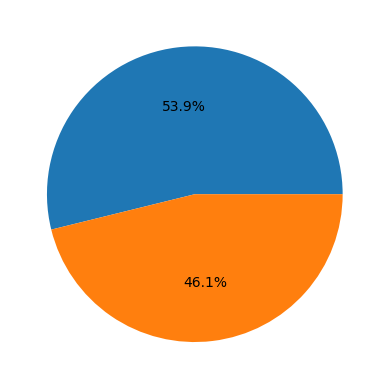

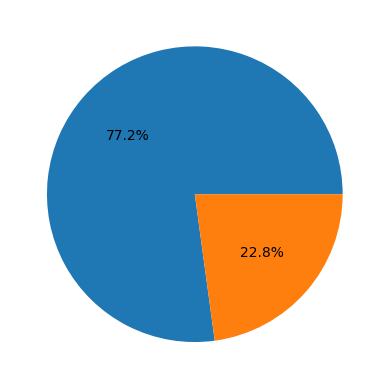

In [ ]:
plt.pie(df['Outcome'].value_counts().values, autopct='%1.1f%%')
plt.show()


plt.pie(df['Jaundice'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [ ]:
#Checking for null values
df.isnull().sum()/df.shape[0]*100

Social_Responsiveness_Scale                           0.0
Age_Years                                             0.0
Speech Delay/Language Disorder                        0.0
Learning disorder                                     0.0
Genetic_Disorders                                     0.0
Depression                                            0.0
Global developoental delay/intellectual disability    0.0
Social/Behavioural Issues                             0.0
Childhood Autism Rating Scale                         0.0
Anxiety_disorder                                      0.0
Sex                                                   0.0
Jaundice                                              0.0
Family_member_with_ASD                                0.0
Outcome                                               0.0
dtype: float64

In [ ]:
# separating the data and labels
X= df.drop(columns = 'Outcome', axis=1)
Y= df['Outcome']

# SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix
from tabulate import tabulate

# Load your CSV file
file_path = 'asd_data_csv.csv'
data = pd.read_csv(file_path)

# Assume the target column is named 'target'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Set the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize Support Vector Classification model
model = SVC()

# Lists to store metric scores for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_values = []
confusion_matrices = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_recall_fscore = precision_recall_fscore_support(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Store metric scores and confusion matrix in lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    support_values.append(precision_recall_fscore[3])
    confusion_matrices.append(confusion_mat)

# Create a table to display the metrics for each fold
table = pd.DataFrame({
    'Fold': range(1, num_folds + 1),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Support': support_values,
    'Confusion Matrix': confusion_matrices
})

# Print the table with confusion matrices
for index, row in table.iterrows():
    print(f"Fold {int(row['Fold'])}:\n")
    print(tabulate(row['Confusion Matrix'], headers=['Predicted 0', 'Predicted 1'], tablefmt='psql'))
    print("\n" + "=" * 40 + "\n")

# Optionally, you can also print other metrics
table = table.drop('Confusion Matrix', axis=1)
print(tabulate(table, headers='keys', tablefmt='psql', showindex=False))


Fold 1:

+---------------+---------------+
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|           105 |            78 |
|            31 |           179 |
+---------------+---------------+


Fold 2:

+---------------+---------------+
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|           100 |            79 |
|            37 |           176 |
+---------------+---------------+


Fold 3:

+---------------+---------------+
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|            85 |            95 |
|            12 |           200 |
+---------------+---------------+


Fold 4:

+---------------+---------------+
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|            94 |            84 |
|            28 |           186 |
+---------------+---------------+


Fold 5:

+---------------+---------------+
|   Predicted 0 |   Predicted 1 |
|---------------+---------------|
|           109 |            

# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix
from tabulate import tabulate

# Load your CSV file
file_path = 'asd_data_csv.csv'
data = pd.read_csv(file_path)

# Assume the target column is named 'target'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Set the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Lists to store metric scores for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_values = []
conf_matrices = []  # To store confusion matrices

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_recall_fscore = precision_recall_fscore_support(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store metric scores in lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    support_values.append(precision_recall_fscore[3])  # 3 corresponds to support values in precision_recall_fscore_support
    conf_matrices.append(conf_matrix)

# Display confusion matrices for each fold
for fold, conf_matrix in enumerate(conf_matrices, 1):
    print(f"Confusion Matrix - Fold {fold}:\n")
    print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
    print("\n" + "=" * 40 + "\n")

# Create a table to display the metrics for each fold
table = pd.DataFrame({
    'Fold': range(1, num_folds + 1),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Support': support_values
})

# Display the table
print(tabulate(table, headers='keys', tablefmt='psql', showindex=False))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Confusion Matrix - Fold 1:

          Predicted 0  Predicted 1
Actual 0          132           51
Actual 1           71          139


Confusion Matrix - Fold 2:

          Predicted 0  Predicted 1
Actual 0          117           62
Actual 1           60          153


Confusion Matrix - Fold 3:

          Predicted 0  Predicted 1
Actual 0          100           80
Actual 1           46          166


Confusion Matrix - Fold 4:

          Predicted 0  Predicted 1
Actual 0          114           64
Actual 1           58          156


Confusion Matrix - Fold 5:

          Predicted 0  Predicted 1
Actual 0          125           60
Actual 1           48          159


+--------+------------+-------------+----------+------------+-----------+
|   Fold |   Accuracy |   Precision |   Recall |   F1 Score | Support   |
|--------+------------+-------------+----------+------------+-----------|
|      1 |   0.689567 |    0.731579 | 0.661905 |   0.695    | [183 210] |
|      2 |   0.688776 |    0.

# XG Boost

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix
from tabulate import tabulate

# Load your CSV file
file_path = 'asd_data_csv.csv'
data = pd.read_csv(file_path)

# Assume the target column is named 'target'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Set the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize XGBoost Classifier model
model = XGBClassifier()

# Lists to store metric scores for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_values = []
conf_matrices = []  # To store confusion matrices

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_recall_fscore = precision_recall_fscore_support(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store metric scores in lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    support_values.append(precision_recall_fscore[3])  # 3 corresponds to support values in precision_recall_fscore_support
    conf_matrices.append(conf_matrix)

# Display confusion matrices for each fold
for fold, conf_matrix in enumerate(conf_matrices, 1):
    print(f"Confusion Matrix - Fold {fold}:\n")
    print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
    print("\n" + "=" * 40 + "\n")

# Create a table to display the metrics for each fold
table = pd.DataFrame({
    'Fold': range(1, num_folds + 1),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Support': support_values
})

# Display the table
print(tabulate(table, headers='keys', tablefmt='psql', showindex=False))


Confusion Matrix - Fold 1:

          Predicted 0  Predicted 1
Actual 0          110           73
Actual 1           45          165


Confusion Matrix - Fold 2:

          Predicted 0  Predicted 1
Actual 0          114           65
Actual 1           55          158


Confusion Matrix - Fold 3:

          Predicted 0  Predicted 1
Actual 0           98           82
Actual 1           48          164


Confusion Matrix - Fold 4:

          Predicted 0  Predicted 1
Actual 0          108           70
Actual 1           61          153


Confusion Matrix - Fold 5:

          Predicted 0  Predicted 1
Actual 0          114           71
Actual 1           53          154


+--------+------------+-------------+----------+------------+-----------+
|   Fold |   Accuracy |   Precision |   Recall |   F1 Score | Support   |
|--------+------------+-------------+----------+------------+-----------|
|      1 |   0.699746 |    0.693277 | 0.785714 |   0.736607 | [183 210] |
|      2 |   0.693878 |    0.

# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='accuracy', cv=num_folds)

# Perform grid search on the data
grid_search_rf.fit(X, y)

# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best Parameters for Random Forest:", best_params_rf)


Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix
from tabulate import tabulate

# Load your CSV file
file_path = 'asd_data_csv.csv'
data = pd.read_csv(file_path)

# Assume the target column is named 'target'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Set the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize models
svc_model = SVC()
logreg_model = LogisticRegression()
xgb_model = XGBClassifier()

# Lists to store metric scores for each fold
avg_accuracy = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_support = 0
conf_matrices = []  # To store confusion matrices

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train each model
    svc_model.fit(X_train, y_train)
    logreg_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    svc_pred = svc_model.predict(X_test)
    logreg_pred = logreg_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)

    # Combine predictions using a Random Forest classifier
    ensemble_X = pd.DataFrame({'SVC': svc_pred, 'LogisticRegression': logreg_pred, 'XGBoost': xgb_pred})
    rf_model = RandomForestClassifier(**best_params_rf,random_state=42)
    rf_model.fit(ensemble_X, y_test)
    final_pred = rf_model.predict(ensemble_X)

    # Calculate metrics for the final predictions
    accuracy = accuracy_score(y_test, final_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, final_pred)
    conf_matrix = confusion_matrix(y_test, final_pred)

    # Accumulate scores for averaging
    avg_accuracy += accuracy
    avg_precision += precision[1]
    avg_recall += recall[1]
    avg_f1 += f1[1]
    avg_support += support[1]
    conf_matrices.append(conf_matrix)

# Calculate average scores across all folds
avg_accuracy /= num_folds
avg_precision /= num_folds
avg_recall /= num_folds
avg_f1 /= num_folds
avg_support /= num_folds

# Display confusion matrices for each fold
for fold, conf_matrix in enumerate(conf_matrices, 1):
    print(f"Confusion Matrix - Fold {fold}:\n")
    print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
    print("\n" + "=" * 40 + "\n")

# Create a table to display the average scores
table = pd.DataFrame({
    'Metric': ['Average Accuracy', 'Average Precision', 'Average Recall', 'Average F1 Score', 'Average Support'],
    'Value': [avg_accuracy, avg_precision, avg_recall, avg_f1, avg_support]
})

# Display the table
print(tabulate(table, headers='keys', tablefmt='psql', showindex=False))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Confusion Matrix - Fold 1:

          Predicted 0  Predicted 1
Actual 0          105           78
Actual 1           31          179


Confusion Matrix - Fold 2:

          Predicted 0  Predicted 1
Actual 0          102           77
Actual 1           29          184


Confusion Matrix - Fold 3:

          Predicted 0  Predicted 1
Actual 0           83           97
Actual 1            9          203


Confusion Matrix - Fold 4:

          Predicted 0  Predicted 1
Actual 0           94           84
Actual 1           27          187


Confusion Matrix - Fold 5:

          Predicted 0  Predicted 1
Actual 0          109           76
Actual 1           26          181


+-------------------+------------+
| Metric            |      Value |
|-------------------+------------|
| Average Accuracy  |   0.727693 |
| Average Precision |   0.694493 |
| Average Recall    |   0.884401 |
| Average F1 Score  |   0.777448 |
| Average Support   | 211.2      |
+-------------------+------------+


# Verification

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from tabulate import tabulate

# Load your CSV file
file_path = 'asd_data_csv.csv'
data = pd.read_csv(file_path)

# Assume the target column is named 'target'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Set the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)



# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Lists to store metric scores for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_values = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Random Forest model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    rf_pred = rf_model.predict(X_test)

    # Calculate metrics for the fold
    accuracy = accuracy_score(y_test, rf_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, rf_pred, average='binary')

    # Store metric scores in lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    support_values.append(support)

# Calculate average metric scores
avg_accuracy = sum(accuracy_scores) / num_folds
avg_precision = sum(precision_scores) / num_folds
avg_recall = sum(recall_scores) / num_folds
avg_f1 = sum(f1_scores) / num_folds

# Create a table to display the results
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Support'],
    'Random Forest': [avg_accuracy, avg_precision, avg_recall, avg_f1, avg_support]
})

# Display the table
print(tabulate(table, headers='keys', tablefmt='psql', showindex=False))


+-----------+-----------------+
| Metric    |   Random Forest |
|-----------+-----------------|
| Accuracy  |        0.67924  |
| Precision |        0.695488 |
| Recall    |        0.72179  |
| F1 Score  |        0.707752 |
| Support   |      211.2      |
+-----------+-----------------+


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from tabulate import tabulate

# Load your CSV file
file_path = 'asd_data_csv.csv'
data = pd.read_csv(file_path)

# Assume the target column is named 'target'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Set the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)



# Initialize Random Forest classifier
rf_model = RandomForestClassifier(**best_params_rf,random_state=42)

# Lists to store metric scores for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_values = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Random Forest model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    rf_pred = rf_model.predict(X_test)

    # Calculate metrics for the fold
    accuracy = accuracy_score(y_test, rf_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, rf_pred, average='binary')

    # Store metric scores in lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    support_values.append(support)

# Calculate average metric scores
avg_accuracy = sum(accuracy_scores) / num_folds
avg_precision = sum(precision_scores) / num_folds
avg_recall = sum(recall_scores) / num_folds
avg_f1 = sum(f1_scores) / num_folds

# Create a table to display the results
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Support'],
    'Random Forest': [avg_accuracy, avg_precision, avg_recall, avg_f1, avg_support]
})

# Display the table
print(tabulate(table, headers='keys', tablefmt='psql', showindex=False))


+-----------+-----------------+
| Metric    |   Random Forest |
|-----------+-----------------|
| Accuracy  |        0.722083 |
| Precision |        0.710302 |
| Recall    |        0.817646 |
| F1 Score  |        0.759414 |
| Support   |      211.2      |
+-----------+-----------------+


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from tabulate import tabulate

# Load your CSV file
file_path = 'asd_data_csv.csv'
data = pd.read_csv(file_path)

# Assume the target column is named 'target'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Set the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize models
svc_model = SVC()
logreg_model = LogisticRegression()
xgb_model = XGBClassifier()
# Define hyperparameters
hyperparameters = {
    'max_depth': 5,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(**hyperparameters,random_state=42)

# Lists to store metric scores for each fold
accuracy_scores_svc = []
accuracy_scores_logreg = []
accuracy_scores_xgb = []
final_accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_values = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train each model
    svc_model.fit(X_train, y_train)
    logreg_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    svc_pred = svc_model.predict(X_test)
    logreg_pred = logreg_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)

    # Calculate accuracies for each model
    accuracy_svc = accuracy_score(y_test, svc_pred)
    accuracy_logreg = accuracy_score(y_test, logreg_pred)
    accuracy_xgb = accuracy_score(y_test, xgb_pred)

    # Combine accuracies using Random Forest
    ensemble_X = pd.DataFrame({'SVC': svc_pred, 'LogisticRegression': logreg_pred, 'XGBoost': xgb_pred})
    rf_model.fit(ensemble_X, y_test)
    final_pred = rf_model.predict(ensemble_X)
    final_accuracy = accuracy_score(y_test, final_pred)

    # Calculate precision, recall, F1 score, and support for each model
    precision_svc, recall_svc, f1_svc, support_svc = precision_recall_fscore_support(y_test, svc_pred)
    precision_logreg, recall_logreg, f1_logreg, support_logreg = precision_recall_fscore_support(y_test, logreg_pred)
    precision_xgb, recall_xgb, f1_xgb, support_xgb = precision_recall_fscore_support(y_test, xgb_pred)
    precision_final, recall_final, f1_final, support_final = precision_recall_fscore_support(y_test, final_pred)

    # Store metric scores in lists
    accuracy_scores_svc.append(accuracy_svc)
    accuracy_scores_logreg.append(accuracy_logreg)
    accuracy_scores_xgb.append(accuracy_xgb)
    final_accuracy_scores.append(final_accuracy)

    precision_scores.append([precision_svc[1], precision_logreg[1], precision_xgb[1], precision_final[1]])
    recall_scores.append([recall_svc[1], recall_logreg[1], recall_xgb[1], recall_final[1]])
    f1_scores.append([f1_svc[1], f1_logreg[1], f1_xgb[1], f1_final[1]])
    support_values.append([support_svc[1], support_logreg[1], support_xgb[1], support_final[1]])

# Calculate average metric scores
avg_accuracy_svc = sum(accuracy_scores_svc) / num_folds
avg_accuracy_logreg = sum(accuracy_scores_logreg) / num_folds
avg_accuracy_xgb = sum(accuracy_scores_xgb) / num_folds
avg_final_accuracy = sum(final_accuracy_scores) / num_folds

avg_precision = [sum(p) / num_folds for p in zip(*precision_scores)]
avg_recall = [sum(r) / num_folds for r in zip(*recall_scores)]
avg_f1 = [sum(f) / num_folds for f in zip(*f1_scores)]
avg_support = [sum(s) / num_folds for s in zip(*support_values)]

# Create a table to display the results
table = pd.DataFrame({
    'Model': ['SVC', 'Logistic Regression', 'XGBoost', 'Final Ensemble'],
    'Average Accuracy': [avg_accuracy_svc, avg_accuracy_logreg, avg_accuracy_xgb, avg_final_accuracy],
    'Average Precision': avg_precision,
    'Average Recall': avg_recall,
    'Average F1 Score': avg_f1,
    'Average Support': avg_support
})

# Display the table
print(tabulate(table, headers='keys', tablefmt='psql', showindex=False))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

+---------------------+--------------------+---------------------+------------------+--------------------+-------------------+
| Model               |   Average Accuracy |   Average Precision |   Average Recall |   Average F1 Score |   Average Support |
|---------------------+--------------------+---------------------+------------------+--------------------+-------------------|
| SVC                 |           0.72157  |            0.691566 |         0.873125 |           0.771291 |             211.2 |
| Logistic Regression |           0.694036 |            0.710624 |         0.732064 |           0.720043 |             211.2 |
| XGBoost             |           0.682296 |            0.687801 |         0.752    |           0.718145 |             211.2 |
| Final Ensemble      |           0.727693 |            0.694493 |         0.884401 |           0.777448 |             211.2 |
+---------------------+--------------------+---------------------+------------------+--------------------+-----

# Output

In [ ]:
import numpy as np

# Replace the input_data with your actual input data

input_data = (1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 0, 1, 0)
#input_data = (0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0)
#input_data = (2, 1, 1, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0)

# Create a DataFrame with the input data
input_data_array = np.array([input_data])

# Make predictions using individual models
svc_pred = svc_model.predict(input_data_array)
logreg_pred = logreg_model.predict(input_data_array)
xgb_pred = xgb_model.predict(input_data_array)

# Combine predictions using a Random Forest classifier (stacking model)
ensemble_X = pd.DataFrame({'SVC': svc_pred, 'LogisticRegression': logreg_pred, 'XGBoost': xgb_pred})
final_pred = rf_model.predict(ensemble_X)

# Display predictions from individual models and the final stacked prediction
print("Predictions from individual models:")
print(f"SVC Prediction: {svc_pred}")
print(f"Logistic Regression Prediction: {logreg_pred}")
print(f"XGBoost Prediction: {xgb_pred}")

print("\nFinal Stacked Prediction:")
print(f"Ensemble Model Prediction: {final_pred}")


Predictions from individual models:
SVC Prediction: [1]
Logistic Regression Prediction: [1]
XGBoost Prediction: [0]

Final Stacked Prediction:
Ensemble Model Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
models = ['Support Vector Machine','LogisticRegression','XGBClassifier','Final Ensemble']
tests_accuracy = [(np.mean(avg_accuracy_svc)*100),(np.mean(avg_accuracy_logreg)*100),(np.mean(avg_accuracy_xgb)*100),(np.mean(avg_final_accuracy)*100)]

In [ ]:
compare_models = pd.DataFrame({ "Algorithms": models, "Accuracy": tests_accuracy })
compare_models

,Algorithms,Accuracy
0,Support Vector Machine,72.157008
1,LogisticRegression,69.403593
2,XGBClassifier,68.229605
3,Final Ensemble,72.769253


In [ ]:
if (final_pred==[1]):
  print("The person has Autism")
else:
  print("The person does not have Autism")

The person has Autism
